# Install

In [74]:
%pip install tensorflow tf2onnx matplotlib numpy opencv-python scipy

  Using cached tensorflow-2.20.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.5 kB)
  Using cached tf2onnx-1.16.1-py3-none-any.whl.metadata (1.3 kB)
  Using cached matplotlib-3.10.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.3.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl.metadata (19 kB)
  Using cached scipy-1.16.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached mediapipe-0.10.21-cp312-cp312-macosx_11_0_universal2.whl.metadata (9.9 kB)
  Using cached pandas-2.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached goo

In [3]:
%pip install --upgrade --force-reinstall tensorflow tf2onnx matplotlib numpy opencv-python scipy mediapipe pandas tqdm scikit-learn 


  Using cached numpy-2.3.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached h5py-3.15.0-cp312-cp312-win_amd64.whl.metadata (3.1 kB)
  Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached protobuf-6.33.0-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached six

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.4 which is incompatible.


In [79]:
!{sys.executable} -m pip install scikit-learn


  Using cached scikit_learn-1.7.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 959.4 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


# import and constant

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import string
import os
import shutil
import os
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import joblib

In [17]:
dataset_dir = './dataset'
model_name = 'sign_classifier'

# Dataset

In [6]:
!curl -L -o ./alfabet-bisindo.zip\
  https://www.kaggle.com/api/v1/datasets/download/achmadnoer/alfabet-bisindo

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0  114M    0 83232    0     0  54378      0  0:36:51  0:00:01  0:36:50 54378
  8  114M    8 10.0M    0     0  4148k      0  0:00:28  0:00:02  0:00:26 10.5M
 18  114M   18 21.2M    0     0  6273k      0  0:00:18  0:00:03  0:00:15 10.9M
 28  114M   28 32.5M    0     0  7453k      0  0:00:15  0:00:04  0:00:11 11.0M
 38  114M   38 43.8M    0     0  8198k      0  0:00:14  0:00:05  0:00:09 11.0M
 48  114M   48 55.1M    0     0  8716k      0  0:00:13  0:00:06  0:00:07 11.1M
 56  114M   56 65.1M    0     0  8920k      0  0:00:13  0:00:07  0:00:06 11.0M
 66  114M   66 76.4M    0     0  9230k      0  0:0

In [18]:
import zipfile
import os
import platform

zip_path = "./alfabet-bisindo.zip"
extract_dir = "./"

if not os.path.exists(zip_path):
    raise FileNotFoundError(f"❌ File tidak ditemukan: {zip_path}")

print(f"📦 Ekstraksi dataset dari {zip_path} ...")
if platform.system() in ["Windows", "Darwin", "Linux"]:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"✅ Dataset berhasil diekstrak ke {extract_dir}")
else:
    print(f"⚠️ OS {platform.system()} belum dikenali, pastikan unzip dilakukan manual.")


📦 Ekstraksi dataset dari ./alfabet-bisindo.zip ...
✅ Dataset berhasil diekstrak ke ./


In [19]:
import os
import shutil

src_dir = "Citra BISINDO"
dst_dir = "./dataset"

if not os.path.exists(src_dir):
    raise FileNotFoundError(f"❌ Folder sumber tidak ditemukan: {src_dir}")

os.makedirs(dst_dir, exist_ok=True)

print(f"📂 Memindahkan '{src_dir}' ke '{dst_dir}' ...")
shutil.move(src_dir, dst_dir)
print(f"✅ Berhasil dipindahkan ke {dst_dir}")


📂 Memindahkan 'Citra BISINDO' ke './dataset' ...
✅ Berhasil dipindahkan ke ./dataset


In [1]:
!curl -L -o ./indonesian-sign-language-bisindo.zip\
  https://www.kaggle.com/api/v1/datasets/download/agungmrf/indonesian-sign-language-bisindo

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 1396M    0  110k    0     0  70686      0  5:45:23  0:00:01  5:45:22  111k
  0 1396M    0 2528k    0     0   976k      0  0:24:25  0:00:02  0:24:23 1277k
  0 1396M    0 7005k    0     0  1950k      0  0:12:13  0:00:03  0:12:10 2350k
  0 1396M    0 11.4M    0     0  2551k      0  0:09:20  0:00:04  0:09:16 2942k
  1 1396M    1 16.0M    0     0  2945k      0  0:08:05  0:00:05  0:08:00 3306k
  1 1396M    1 20.4M    0     0  3179k      0  0:07:29  0:00:06  0:07:23 4178k
  1 1396M    1 23.4M    0     0  3167k      0  0:07:31  0:00:07  0:07:24 4303k
  1 1396M    1 27.1M    0     0  3238k      0  0:0

In [4]:
def merge_dataset(src_folder):
    """
    Move files from src_folder into dataset, preserving subfolder (label) structure.
    Example: src_folder/cat -> dataset/cat
             src_folder/dog -> dataset/dog
    """
    # Ensure destination exists
    os.makedirs(dataset_dir, exist_ok=True)

    # Iterate over all label folders in the source
    for label in os.listdir(src_folder):
        # Lewati folder yang mengandung '_npy'
        if "_npy" in label:
            continue
        
        label_path_src = os.path.join(src_folder, label)
        label_path_dest = os.path.join(dataset_dir, label)

        # Skip if not a folder
        if not os.path.isdir(label_path_src):
            continue

        # Create label folder in destination if needed
        os.makedirs(label_path_dest, exist_ok=True)

        # Move all files from src → dest
        for filename in os.listdir(label_path_src):
            src = os.path.join(label_path_src, filename)
            dst = os.path.join(label_path_dest, filename)

            # Avoid overwriting files with same name
            if os.path.exists(dst):
                base, ext = os.path.splitext(filename)
                dst = os.path.join(label_path_dest, f"{base}_2{ext}")

            shutil.move(src, dst)

    print(f"✅ Merged '{src_folder}' into '{dataset_dir}' successfully!")

In [30]:
import zipfile
import os
import platform

def unzip_file(zip_path,extract_dir = "./"):
    if not os.path.exists(zip_path):
        raise FileNotFoundError(f"❌ File tidak ditemukan: {zip_path}")

    print(f"📦 Ekstraksi dataset dari {zip_path} ...")
    if platform.system() in ["Windows", "Darwin", "Linux"]:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"✅ Dataset berhasil diekstrak ke {extract_dir}")
    else:
        print(f"⚠️ OS {platform.system()} belum dikenali, pastikan unzip dilakukan manual.")

In [20]:
import shutil
import os


def remove_folder(folder_path):
    if os.path.exists(folder_path):
        print(f"🗑️ Menghapus folder: {folder_path}")
        shutil.rmtree(folder_path)
        print("✅ Folder berhasil dihapus.")
    else:
        print("⚠️ Folder tidak ditemukan, tidak ada yang dihapus.")

In [ ]:
unzip_file("./indonesian-sign-language-bisindo.zip")

📦 Ekstraksi dataset dari ./indonesian-sign-language-bisindo.zip ...
✅ Dataset berhasil diekstrak ke ./


In [8]:
merge_dataset('./bisindo/images/train')

✅ Merged './bisindo/images/train' into './dataset' successfully!


In [9]:
merge_dataset('./bisindo/images/val')

✅ Merged './bisindo/images/val' into './dataset' successfully!


In [ ]:
remove_folder('./bisindo')

🗑️ Menghapus folder: ./bisindo
✅ Folder berhasil dihapus.


In [11]:
!curl -L -o ./bisindo-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/yunitayupratiwi/bisindo-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0 24.1M    0   527    0     0    426      0 16:30:15  0:00:01 16:30:14   426
  2 24.1M    2  501k    0     0   239k      0  0:01:43  0:00:02  0:01:41  585k
  2 24.1M    2  723k    0     0   213k      0  0:01:55  0:00:03  0:01:52  334k
  2 24.1M    2  723k    0     0   164k      0  0:02:30  0:00:04  0:02:26  228k
  2 24.1M    2  723k    0     0   134k      0  0:03:04  0:00:05  0:02:59  173k
  2 24.1M    2  723k    0     0   113k      0  0:03:38  0:00:06  0:03:32  140k
  2 24.1M    2  723k    0     0    97k      0  0:04:12  0:00:07  0:04:05 42896
  2 24.1M    2  723k    0     0  88168      0  0:0

In [ ]:
unzip_file("./bisindo-dataset.zip")

📦 Ekstraksi dataset dari ./bisindo-dataset.zip ...
✅ Dataset berhasil diekstrak ke ./


In [13]:
def construct_dataset(src_folder):
    """
    Move files from src_folder into dataset, based on the first letter of the filename.
    Example: src_folder/A.66ae97e2-c1e4-11eb-83d3-0008ca6b6d30.jpg -> dataset/A
             src_folder/B.002d8fdf-c1e3-11eb-952a-0008ca6b6d30.jpg -> dataset/B
    """
    # Ensure destination exists
    os.makedirs(dataset_dir, exist_ok=True)

    # Iterate over all file folders in the source
    for filename in os.listdir(src_folder):
        src_file = os.path.join(src_folder, filename)

        # Skip if a folder
        if os.path.isdir(src_file):
            continue
        
        # Skip if not a jpg
        if not src_file.lower().endswith('.jpg'):
            continue
        
        label = filename[0].upper()  # First character as label
        dest = os.path.join(dataset_dir, label)
        # Create label folder in destination if needed
        os.makedirs(dest, exist_ok=True)

        dst_file = os.path.join(dest, filename)

        # Avoid overwriting files with same name
        if os.path.exists(dst_file):
            base, ext = os.path.splitext(filename)
            dst_file = os.path.join(dest, f"{base}_3{ext}")

        shutil.move(src_file, dst_file)

    print(f"successfully!")

In [14]:
construct_dataset("./BISINDO - Dataset/test")

successfully!


In [15]:
construct_dataset("./BISINDO - Dataset/train")

successfully!


In [ ]:
remove_folder('./BISINDO - Dataset')

🗑️ Menghapus folder: ./BISINDO - Dataset
✅ Folder berhasil dihapus.


In [13]:
!curl -L -o ./sign-language-bisindo.zip\
  https://www.kaggle.com/api/v1/datasets/download/bonarsitorus/sign-language-bisindo

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  238M  100  238M    0     0   952k      0  0:04:17  0:04:16  0:00:01  937k0:14:54  0:00:02  0:14:52  367k48k      0  0:05:26  0:00:52  0:04:34  680k  0:01:14  0:04:07  824k:04:00  808k    0   762k      0  0:05:20  0:01:21  0:03:59  801k03:44  984kM    0     0   838k      0  0:04:51  0:01:46  0:03:05 1354k 0   839k      0  0:04:51  0:01:47  0:03:04 1247k 0   951k      0  0:04:17  0:04:17 --:--:--  889k


In [14]:
unzip_file("./sign-language-bisindo.zip")

📦 Ekstraksi dataset dari ./sign-language-bisindo.zip ...
✅ Dataset berhasil diekstrak ke ./


In [18]:
merge_dataset('./data_tambahan')

✅ Merged './data_tambahan' into './dataset' successfully!


In [21]:
remove_folder('./data_tambahan')

🗑️ Menghapus folder: ./data_tambahan
✅ Folder berhasil dihapus.


In [2]:
!curl -L -o ./indonesian-hand-sign-language-bisindo-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/kelsha/indonesian-hand-sign-language-bisindo-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1944M  100 1944M    0     0  1384k      0  0:23:58  0:23:58 --:--:-- 1620k  1289k      0  0:25:44  0:00:35  0:25:09 1107k    0  0:25:05  0:00:52  0:24:13 1231k:25:11  930k2:35  0:01:37  0:20:58 1712k:20:45 1870k   0  1510k      0  0:21:58  0:01:58  0:20:00 1295k30  0:02:03  0:20:27  599k2:55  0:02:08  0:20:47  794k      0  0:23:20  0:02:17  0:21:03  706k8k      0  0:23:24  0:02:31  0:20:53 1673k  0:23:12  0:02:37  0:20:35 1660k3:18  0:02:38  0:20:40 1286k1383k      0  0:23:59  0:02:51  0:21:08  906k      0  0:24:05  0:02:55  0:21:10 1172k 0:21:07 1661k82k      0  0:24:00  0:03:51  0:20:09  813k03:59  0:20:19  804kk1339k      0  0:24:47  0:05:30  0:19:17 1022k06:40  0:17:47 1785k0     0  1354k      0  0:24:30  0:07:02  0:17:28  849k4  0:16:58 1683k22

In [22]:
unzip_file("./indonesian-hand-sign-language-bisindo-dataset.zip")

📦 Ekstraksi dataset dari ./indonesian-hand-sign-language-bisindo-dataset.zip ...
✅ Dataset berhasil diekstrak ke ./


In [24]:
merge_dataset('./dataset_bisindo/train/images')

✅ Merged './dataset_bisindo/train/images' into './dataset' successfully!


In [25]:
merge_dataset('./dataset_bisindo/val/images')

✅ Merged './dataset_bisindo/val/images' into './dataset' successfully!


In [27]:
remove_folder("./dataset_bisindo")

🗑️ Menghapus folder: ./dataset_bisindo
✅ Folder berhasil dihapus.


In [ ]:
!curl -L -o .bisindo-final.zip/\
  https://www.kaggle.com/api/v1/datasets/download/skripsiairlangga/bisindo-final

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2198M  100 2197M    0     0  1517k      0  0:24:43  0:24:42  0:00:01  568k   0     0  1659k      0  0:22:36  0:00:31  0:22:05 2007k47  0:00:36  0:22:11 1553kk     0  0:22:54  0:00:53  0:22:01 1672k 0  1697k      0  0:22:06  0:01:15  0:20:51 1689k01  0:01:19  0:20:42 1814k 1704k      0  0:22:00  0:01:20  0:20:40 1820k:50  0:01:29  0:21:21 1060k:01:51  0:21:12 1507k2:52  0:02:01  0:20:51 1726k:55  0:02:05  0:20:50 1538k:22:51  0:02:12  0:20:39 1828k   0  1640k      0  0:22:51  0:02:14  0:20:37 1832k22:27  0:02:50  0:19:37 1691k    0  1688k      0  0:22:12  0:03:13  0:18:59 1755k20  0:18:45 2060k707k      0  0:21:58  0:03:28  0:18:30 1978k 1707k      0  0:21:58  0:03:29  0:18:29 1991k  0:18:10 2012k5  0:04:24  0:17:01 1897k90k      0  0:20:56  0:04:42 

In [31]:
unzip_file("bisindo-final.zip","./temp_dataset")

📦 Ekstraksi dataset dari bisindo-final.zip ...
✅ Dataset berhasil diekstrak ke ./temp_dataset


In [32]:
merge_dataset('./temp_dataset')

✅ Merged './temp_dataset' into './dataset' successfully!


In [33]:
remove_folder('./temp_dataset')

🗑️ Menghapus folder: ./temp_dataset
✅ Folder berhasil dihapus.


In [34]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2)  # dua tangan
mp_drawing = mp.solutions.drawing_utils

I0000 00:00:1760603272.901772 1210015 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1 Pro


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1760603272.927674 1401344 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760603272.933433 1401350 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [35]:
def extract_hand_landmarks(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = hands.process(image_rgb)
    
    if not result.multi_hand_landmarks:
        return None
    
    # List semua tangan yang terdeteksi
    coords_all = []
    for landmarks in result.multi_hand_landmarks:
        coords = []
        for lm in landmarks.landmark:
            coords.extend([lm.x, lm.y, lm.z])
        coords_all.append(coords)
    
    # Jika hanya 1 tangan, tambahkan 0 agar panjang fitur tetap konsisten
    if len(coords_all) == 1:
        coords_all.append([0.0]*63)  # tangan kosong
    
    # Flatten dua tangan (kanan + kiri)
    features = np.array(coords_all[0] + coords_all[1])
    return features

In [36]:
data = []
labels = []

for label in sorted(os.listdir(dataset_dir)):
    label_path = os.path.join(dataset_dir, label)
    if not os.path.isdir(label_path):
        continue

    print(f'Processing label: {label}')
    for img_name in tqdm(os.listdir(label_path)):
        img_path = os.path.join(label_path, img_name)
        landmarks = extract_hand_landmarks(img_path)
        if landmarks is not None:
            data.append(landmarks)
            labels.append(label)

Processing label: A


  0%|          | 0/1185 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
100%|██████████| 1185/1185 [00:44<00:00, 26.60it/s]


Processing label: B


100%|██████████| 1209/1209 [00:44<00:00, 27.25it/s]


Processing label: C


100%|██████████| 1170/1170 [00:38<00:00, 30.39it/s]


Processing label: D


100%|██████████| 1177/1177 [00:48<00:00, 24.36it/s]


Processing label: E


100%|██████████| 1192/1192 [00:40<00:00, 29.65it/s]


Processing label: F


100%|██████████| 1223/1223 [00:44<00:00, 27.54it/s]


Processing label: G


100%|██████████| 1211/1211 [00:48<00:00, 25.10it/s]


Processing label: H


100%|██████████| 1182/1182 [00:47<00:00, 24.74it/s]


Processing label: I


100%|██████████| 1210/1210 [00:41<00:00, 28.93it/s]


Processing label: J


100%|██████████| 1208/1208 [00:40<00:00, 29.51it/s]


Processing label: K


100%|██████████| 1181/1181 [00:47<00:00, 24.79it/s]


Processing label: L


100%|██████████| 1205/1205 [00:40<00:00, 29.94it/s]


Processing label: M


100%|██████████| 1197/1197 [00:52<00:00, 22.93it/s]


Processing label: N


100%|██████████| 1185/1185 [00:48<00:00, 24.66it/s]


Processing label: O


100%|██████████| 1216/1216 [00:42<00:00, 28.38it/s]


Processing label: P


100%|██████████| 1205/1205 [00:48<00:00, 25.04it/s]


Processing label: Q


100%|██████████| 1180/1180 [00:50<00:00, 23.36it/s]


Processing label: R


100%|██████████| 1185/1185 [00:41<00:00, 28.43it/s]


Processing label: S


100%|██████████| 1176/1176 [00:50<00:00, 23.41it/s]


Processing label: T


100%|██████████| 1212/1212 [00:50<00:00, 24.12it/s]


Processing label: U


100%|██████████| 1203/1203 [00:41<00:00, 28.79it/s]


Processing label: V


100%|██████████| 1204/1204 [00:42<00:00, 28.16it/s]


Processing label: W


100%|██████████| 1209/1209 [00:49<00:00, 24.58it/s]


Processing label: X


100%|██████████| 1202/1202 [00:51<00:00, 23.35it/s]


Processing label: Y


100%|██████████| 1147/1147 [00:43<00:00, 26.56it/s]


Processing label: Z


100%|██████████| 1211/1211 [00:41<00:00, 29.14it/s]


In [37]:
# Ubah list menjadi DataFrame
df = pd.DataFrame(data)
df['label'] = labels

# Simpan ke CSV
df.to_csv("hand_keypoints.csv", index=False)

print("✅ Data dan label berhasil disimpan ke hand_keypoints.csv")

✅ Data dan label berhasil disimpan ke hand_keypoints.csv


# Train

In [38]:
df = pd.read_csv("hand_keypoints.csv")
print(f"Total data: {len(df)}")
print(df.head())


Total data: 25042
          0         1             2         3         4         5         6  \
0  0.589247  0.788576  7.728872e-08  0.540709  0.797574 -0.010116  0.494011   
1  0.212959  0.805963  9.068014e-07  0.289683  0.816899 -0.121823  0.372062   
2  0.816977  0.762781 -9.138290e-08  0.801776  0.732194  0.003006  0.774098   
3  0.113166  0.822598  5.402187e-07  0.195478  0.813337 -0.077612  0.288585   
4  0.261052  0.846672  7.994739e-07  0.341049  0.836045 -0.129487  0.410872   

          7         8         9  ...       117       118       119       120  \
0  0.776065 -0.034892  0.458913  ...  0.259818  0.687959 -0.093514  0.256858   
1  0.769015 -0.183119  0.454951  ...  0.842265  0.543980 -0.132140  0.839403   
2  0.710473  0.000879  0.747478  ...  0.627653  0.740314 -0.056922  0.625121   
3  0.775301 -0.115066  0.381175  ...  0.871712  0.542661 -0.079860  0.875387   
4  0.782396 -0.189924  0.487691  ...  0.855348  0.492066 -0.134088  0.863155   

        121       122     

In [39]:
le = LabelEncoder()
y = le.fit_transform(df['label'])
X = df.drop('label', axis=1).values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [41]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        32,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,762 (268.60 KB)

 Trainable params: 68,762 (268.60 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=1000, batch_size=32)

Epoch 1/1000
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2742 - loss: 2.4622 - val_accuracy: 0.5233 - val_loss: 1.7429
Epoch 2/1000
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5186 - loss: 1.6601 - val_accuracy: 0.6544 - val_loss: 1.2588
Epoch 3/1000
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6142 - loss: 1.3427 - val_accuracy: 0.7319 - val_loss: 1.0242
Epoch 4/1000
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6594 - loss: 1.1704 - val_accuracy: 0.7357 - val_loss: 0.9552
Epoch 5/1000
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6964 - loss: 1.0598 - val_accuracy: 0.7872 - val_loss: 0.8133
Epoch 6/1000
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7211 - loss: 0.9715 - val_accuracy: 0.7732 - val_loss: 0.7961
Epoch 7/1000
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7345 - loss: 0.9196 - val_accuracy: 0.7988 - val_loss: 0.7275
Epoch 8/1000
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7514 - loss: 0.8613 - 

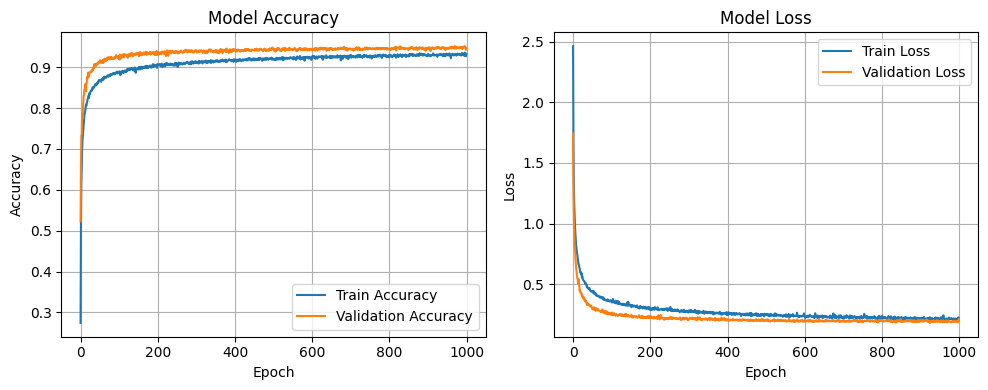

In [45]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# save model

In [46]:
import pickle

model.save(f"{model_name}.keras")
with open(f"{model_name}_label.pkl", "wb") as f:
    pickle.dump(le, f)

In [47]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the .tflite file
with open(f"{model_name}.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: /var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/tmpityif7oh/assets


INFO:tensorflow:Assets written to: /var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/tmpityif7oh/assets


Saved artifact at '/var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/tmpityif7oh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 126), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  13427967952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13427969296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13427969872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13427968912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13427968720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13427970064: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1760606326.356392 1210015 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1760606326.356637 1210015 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
